In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
PL_19_20_df = pd.read_csv('data/2019_2020_Player_Stats.csv', skiprows=1)
PL_18_19_df = pd.read_csv('data/2018_2019_Player_Stats.csv', skiprows=1)
PL_17_18_df = pd.read_csv('data/2017_2018_Player_Stats.csv', skiprows=1)

In [3]:
PL_19_20_df.head()

,Rk,Player▲,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


### Clean up datasets

In [4]:
#clean up 19-20
PL_19_20_df = PL_19_20_df.rename(columns={"Player▲": "Player"})
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [5]:
player_name_split = PL_19_20_df['Player'].str.split('\\')
player_name_split

0        [Patrick van Aanholt, Patrick-van-Aanholt]
1                          [Max Aarons, Max-Aarons]
2                    [Tammy Abraham, Tammy-Abraham]
3                            [Che Adams, Che-Adams]
4                                  [Adrián, Adrian]
                           ...                     
483                  [Wilfried Zaha, Wilfried-Zaha]
484    [Christoph Zimmermann, Christoph-Zimmermann]
485      [Oleksandr Zinchenko, Oleksandr-Zinchenko]
486                        [Kurt Zouma, Kurt-Zouma]
487                        [Mesut Özil, Mesut-Ozil]
Name: Player, Length: 488, dtype: object

In [6]:
player_names = player_name_split.map(lambda _:_[0])
player_names

0       Patrick van Aanholt
1                Max Aarons
2             Tammy Abraham
3                 Che Adams
4                    Adrián
               ...         
483           Wilfried Zaha
484    Christoph Zimmermann
485     Oleksandr Zinchenko
486              Kurt Zouma
487              Mesut Özil
Name: Player, Length: 488, dtype: object

In [7]:
PL_19_20_df['Player'] = player_names
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [8]:
#nation_split = PL_19_20_df['Nation'].str.split(' ', 1, expand=True)

In [9]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)

In [10]:
#nation_split.drop(columns={'A'})

In [11]:
#PL_19_20_df['Nation'] = nation_split['B']

In [12]:
PL_19_20_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
PL_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [23]:
position_counts = PL_19_20_df.Pos.value_counts()
position_counts

DF    176
MF    166
FW    110
GK     36
Name: Pos, dtype: int64

In [14]:
position_split = PL_19_20_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_19_20_df["Pos"] = PL_19_20_df["Pos"].apply(change_string)
PL_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [27]:
GK_19_20_df = PL_19_20_df[PL_19_20_df['Pos']=='GK']
GK_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
11,Alisson,GK,Liverpool,19,19,1644.0,0,1,0,0,...,0.0,0.05,0.0,0.0,0.4,0.0,0.02,0.02,0.0,0.02
22,Kepa Arrizabalaga,GK,Chelsea,24,24,2160.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
58,Claudio Bravo,GK,Manchester City,4,3,346.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
63,Willy Caballero,GK,Chelsea,3,3,270.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00


In [29]:
FMD_19_20_df = PL_19_20_df[PL_19_20_df['Pos']!='GK']
FMD_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
5,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [30]:
FMD_19_20_df.to_csv(r'data/outfield_19_20.csv')

In [15]:
#clean up 18-19
PL_18_19_df = PL_18_19_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_18_19_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_18_19_df['Player'] = player_names
#nation_split = PL_18_19_df['Nation'].str.split(' ', 1, expand=True)

In [21]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)
#nation_split.drop(columns={'A'})
#PL_18_19_df['Nation'] = nation_split['B']
PL_18_19_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_18_19_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_18_19_df["Pos"] = PL_18_19_df["Pos"].apply(change_string)
PL_18_19_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05


In [31]:
FMD_18_19_df = PL_18_19_df[PL_18_19_df['Pos']!='GK']
FMD_18_19_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Andre-Frank Zambo Anguissa,MF,Fulham,22,16,1518.0,0,0,0,0,...,0.00,0.00,0.8,0.8,0.3,0.05,0.02,0.06,0.05,0.06
504,Davide Zappacosta,DF,Chelsea,4,1,125.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.1,0.05,0.11,0.15,0.05,0.15
505,Oleksandr Zinchenko,DF,Manchester City,14,14,1153.0,0,3,0,0,...,0.00,0.23,0.2,0.2,1.2,0.01,0.10,0.11,0.01,0.11
506,Kenneth Zohore,FW,Cardiff City,19,7,746.0,1,1,0,0,...,0.12,0.24,1.8,1.8,1.0,0.22,0.12,0.34,0.22,0.34


In [32]:
FMD_18_19_df.to_csv(r'data/outfield_18_19.csv')

In [22]:
#clean up17-18
PL_17_18_df = PL_17_18_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_17_18_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_17_18_df['Player'] = player_names
PL_17_18_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_17_18_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_17_18_df["Pos"] = PL_17_18_df["Pos"].apply(change_string)
PL_17_18_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,28,25,2184,5,1,0,0,...,0.21,0.25,3.4,3.4,1.7,0.14,0.07,0.21,0.14,0.21
1,Rolando Aarons,MF,Newcastle Utd,4,1,139,0,0,0,0,...,0.00,0.00,0.2,0.2,0.0,0.12,0.00,0.12,0.12,0.12
2,Tammy Abraham,FW,Swansea City,31,15,1726,6,1,0,0,...,0.31,0.37,6.4,6.4,0.8,0.33,0.04,0.38,0.33,0.38
3,Charlie Adam,MF,Stoke City,11,5,411,0,0,0,1,...,0.00,0.00,1.4,0.6,1.4,0.30,0.32,0.62,0.13,0.45
4,Adrián,GK,West Ham,19,19,1710,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [33]:
FMD_17_18_df = PL_17_18_df[PL_17_18_df['Pos']!='GK']
FMD_17_18_df.to_csv(r'data/outfield_17_18.csv')

In [36]:
GK_19_20_df = pd.read_csv('data/GK_19_20.csv', skiprows=1)
GK_19_20_df = GK_19_20_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_19_20_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_19_20_df['Player'] = player_names
GK_19_20_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_19_20_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,Liverpool,10,8,783,9,1.03,25,16,0.640,8,0,0,2,25.0,0,0,0,0
1,Alisson,GK,Liverpool,20,20,1734,11,0.57,56,45,0.804,18,1,1,10,50.0,0,0,0,0
2,Kepa Arrizabalaga,GK,Chelsea,24,24,2160,32,1.33,69,41,0.565,12,4,8,5,20.8,2,2,0,0
3,Claudio Bravo,GK,Manchester City,4,3,346,7,1.82,15,8,0.533,2,0,1,1,33.3,0,0,0,0
4,Willy Caballero,GK,Chelsea,4,4,360,7,1.75,15,9,0.533,1,2,1,0,0.0,0,0,0,0
5,Martin Dúbravka,GK,Newcastle Utd,28,28,2520,41,1.46,149,108,0.725,8,8,12,8,28.6,0,0,0,0
6,Ederson,GK,Manchester City,24,24,2081,22,0.95,65,44,0.692,16,3,5,9,37.5,2,2,0,0
7,Łukasz Fabiański,GK,West Ham,15,15,1219,21,1.55,60,42,0.683,5,4,6,4,26.7,3,2,1,0
8,Ralf Fährmann,GK,Norwich City,1,1,22,1,4.09,1,1,1.000,0,0,1,0,0.0,1,1,0,0
9,Ben Foster,GK,Watford,28,28,2520,43,1.54,119,81,0.689,6,9,13,9,32.1,6,6,0,0


In [37]:
GK_19_20_df.to_csv(r'Clean_GK_19_20.csv')

In [49]:
GK_18_19_df = pd.read_csv('GK_18_19.csv', skiprows=1)
GK_18_19_df = GK_18_19_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_18_19_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_18_19_df['Player'] = player_names
GK_18_19_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_18_19_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Alisson,GK,Liverpool,38,38,3420.0,22,0.58,96,74,0.771,30,7,1,21,55.3,1,0,0,1
1,Kepa Arrizabalaga,GK,Chelsea,36,36,3240.0,39,1.08,117,78,0.675,20,8,8,14,38.9,2,1,1,0
2,Asmir Begović,GK,Bournemouth,24,24,2160.0,47,1.96,101,58,0.554,8,3,13,5,20.8,2,2,0,0
3,Marcus Bettinelli,GK,Fulham,7,7,630.0,20,2.86,38,19,0.500,1,2,4,0,0.0,3,1,1,1
4,Artur Boruc,GK,Bournemouth,12,12,1080.0,18,1.50,52,36,0.712,4,3,5,4,33.3,3,3,0,0
5,David Button,GK,Brighton,4,4,360.0,5,1.25,15,12,0.800,1,1,2,1,25.0,2,2,0,0
6,Willy Caballero,GK,Chelsea,2,2,180.0,0,0.00,3,3,1.000,1,1,0,2,100.0,0,0,0,0
7,Petr Čech,GK,Arsenal,7,7,585.0,9,1.38,36,27,0.750,5,0,2,2,28.6,0,0,0,0
8,Joel Coleman,GK,Huddersfield,1,1,90.0,1,1.00,3,1,0.667,0,1,0,0,0.0,0,0,0,0
9,Martin Dúbravka,GK,Newcastle Utd,38,38,3420.0,48,1.26,135,94,0.689,12,9,17,11,28.9,6,6,0,0


In [48]:
#GK_18_19_df = GK_18_19_df.dropna(subset = ["Min"], inplace=True)


In [39]:
GK_18_19_df.to_csv(r'Clean_GK_18_19.csv')

In [40]:
GK_17_18_df = pd.read_csv('GK_17_18.csv', skiprows=1)
GK_17_18_df = GK_17_18_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_17_18_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_17_18_df['Player'] = player_names
GK_17_18_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_17_18_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,West Ham,19,19,1710,29,1.53,95,68,0.705,7,6,6,6,31.6,1,1,0,0
1,Asmir Begović,GK,Bournemouth,38,38,3420,61,1.61,172,113,0.657,11,11,16,6,15.8,4,2,1,1
2,Claudio Bravo,GK,Manchester City,3,2,226,1,0.40,5,4,0.800,2,0,0,1,50.0,0,0,0,0
3,Jack Butland,GK,Stoke City,35,35,3150,61,1.74,199,145,0.719,7,11,17,6,17.1,5,5,0,0
4,Willy Caballero,GK,Chelsea,3,3,270,4,1.33,11,7,0.636,1,1,1,1,33.3,0,0,0,0
5,Petr Čech,GK,Arsenal,34,34,3039,48,1.42,129,86,0.667,16,6,12,11,32.4,6,5,1,0
6,Thibaut Courtois,GK,Chelsea,35,35,3150,34,0.97,105,75,0.695,20,6,9,15,42.9,2,2,0,0
7,Karl Darlow,GK,Newcastle Utd,10,10,900,15,1.50,45,35,0.733,1,5,4,2,20.0,3,3,0,0
8,Martin Dúbravka,GK,Newcastle Utd,12,12,1080,11,0.92,38,27,0.711,6,1,5,4,33.3,1,0,1,0
9,Ederson,GK,Manchester City,36,36,3194,26,0.73,79,54,0.671,30,4,2,16,44.4,3,0,2,1


In [41]:
GK_17_18_df.to_csv(r'Clean_GK_17_18.csv')

### Machine learning model

In [18]:
#expected goal
expected_goals_count = PL_19_20_df['xG'].value_counts()
expected_goals_count

0.0     108
0.1      34
0.2      32
0.6      28
0.3      21
       ... 
4.8       1
10.8      1
13.1      1
3.1       1
6.9       1
Name: xG, Length: 78, dtype: int64

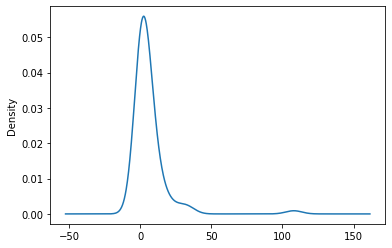

In [19]:
# Visualize the value counts
expected_goals_count.plot.density()